In [18]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
pth_file_path = "Data/eeg_14_70_std.pth"
data = torch.load(pth_file_path)

C:\Users\HP\AppData\Local\Temp/ipykernel_9760/2958551806.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(pth_file_path)


In [4]:
print(type(data))

<class 'dict'>


In [5]:
data.keys()

dict_keys(['dataset', 'labels', 'images'])

In [6]:
type(data['dataset'])

list

In [7]:
data['dataset'][0]

{'eeg': tensor([[-1.6570e-02,  2.7305e-02,  8.0402e-02,  ..., -7.7733e-05,
          -1.9835e-02, -1.5594e-02],
         [-1.0071e-02,  1.1867e-01,  2.4788e-01,  ...,  1.8917e-02,
          -8.7614e-03, -1.9201e-02],
         [ 2.5684e-02, -1.7518e-01, -3.8919e-01,  ..., -1.4881e-01,
          -5.8758e-02,  1.8632e-02],
         ...,
         [ 1.6717e-02,  4.4144e-02,  7.0098e-02,  ...,  1.6365e-01,
           8.8041e-02, -7.7776e-03],
         [-1.6673e-03, -4.8546e-03, -7.2816e-03,  ...,  5.2610e-03,
           1.6651e-03, -2.9540e-03],
         [ 6.4596e-03,  3.2524e-02,  6.4534e-02,  ...,  8.3441e-02,
           3.8469e-02, -1.5483e-02]]),
 'image': 0,
 'label': 10,
 'subject': 4}

In [8]:
len(data['dataset']) #total 11965 eegs

11965

In [9]:
data['dataset'][0].keys()

dict_keys(['eeg', 'image', 'label', 'subject'])

In [10]:
data['dataset'][2]['eeg']

tensor([[-0.0098,  0.0631,  0.1396,  ..., -0.2496, -0.1121,  0.0191],
        [-0.0184,  0.0941,  0.2097,  ..., -0.2759, -0.1278,  0.0134],
        [ 0.0254, -0.0477, -0.1401,  ..., -0.1693, -0.1061, -0.0162],
        ...,
        [-0.0153, -0.0304, -0.0509,  ...,  0.0947,  0.0461, -0.0148],
        [-0.0033, -0.0069, -0.0099,  ...,  0.0083,  0.0034, -0.0026],
        [-0.0201, -0.0536, -0.0820,  ...,  0.1378,  0.0750, -0.0048]])

In [11]:
data['dataset'][2]['eeg'].shape

torch.Size([128, 532])

In [12]:
data['dataset'][2]

{'eeg': tensor([[-0.0098,  0.0631,  0.1396,  ..., -0.2496, -0.1121,  0.0191],
         [-0.0184,  0.0941,  0.2097,  ..., -0.2759, -0.1278,  0.0134],
         [ 0.0254, -0.0477, -0.1401,  ..., -0.1693, -0.1061, -0.0162],
         ...,
         [-0.0153, -0.0304, -0.0509,  ...,  0.0947,  0.0461, -0.0148],
         [-0.0033, -0.0069, -0.0099,  ...,  0.0083,  0.0034, -0.0026],
         [-0.0201, -0.0536, -0.0820,  ...,  0.1378,  0.0750, -0.0048]]),
 'image': 2,
 'label': 29,
 'subject': 4}

In [13]:
SAMPLES_TO_DISCARD = 20 
TARGET_LENGTH = 440


def preprocess_eeg(eeg_tensor):
    eeg_tensor = eeg_tensor[:, SAMPLES_TO_DISCARD:]
    
    if eeg_tensor.shape[1] > TARGET_LENGTH:
        eeg_tensor = eeg_tensor[:, :TARGET_LENGTH]
    elif eeg_tensor.shape[1] < TARGET_LENGTH:
        padding = TARGET_LENGTH - eeg_tensor.shape[1]
        eeg_tensor = torch.nn.functional.pad(eeg_tensor, (0, padding), mode='constant', value=0)
    
    return eeg_tensor.numpy()

df = pd.DataFrame({
    'eeg': [preprocess_eeg(record['eeg']) for record in data['dataset']],
    'label': [record['label'] for record in data['dataset']]
})


print(df.head())
print(df['eeg'].iloc[0].shape)

                                                 eeg  label
0  [[-0.38386747, -0.3927711, -0.35507917, -0.277...     10
1  [[-0.31207818, -0.34036472, -0.3237142, -0.271...     30
2  [[-0.3254072, -0.33036608, -0.2972892, -0.2296...     29
3  [[0.01659986, -0.031756304, -0.059429802, -0.0...     10
4  [[-0.27999252, -0.25151598, -0.22330613, -0.19...     30
(128, 440)


In [14]:
df.head()

,eeg,label
0,"[[-0.38386747, -0.3927711, -0.35507917, -0.277...",10
1,"[[-0.31207818, -0.34036472, -0.3237142, -0.271...",30
2,"[[-0.3254072, -0.33036608, -0.2972892, -0.2296...",29
3,"[[0.01659986, -0.031756304, -0.059429802, -0.0...",10
4,"[[-0.27999252, -0.25151598, -0.22330613, -0.19...",30


In [15]:
df.shape

(11965, 2)

In [16]:
df['label'].value_counts().sort_index()

0     300
1     300
2     300
3     300
4     300
5     300
6     300
7     300
8     300
9     300
10    300
11    300
12    300
13    300
14    300
15    300
16    300
17    300
18    294
19    300
20    300
21    300
22    300
23    300
24    300
25    294
26    294
27    300
28    300
29    300
30    300
31    300
32    300
33    283
34    300
35    300
36    300
37    300
38    300
39    300
Name: label, dtype: int64

In [17]:
df['eeg'][0] #128 channels and in each channels 440 samples

array([[-0.38386747, -0.3927711 , -0.35507917, ..., -0.1581563 ,
        -0.23821583, -0.30213886],
       [-0.5158133 , -0.51820505, -0.47259077, ..., -0.07621322,
        -0.16074024, -0.23866539],
       [ 0.720489  ,  0.67270964,  0.5447726 , ...,  0.62933016,
         0.74818915,  0.8190792 ],
       ...,
       [-0.19029617, -0.17019393, -0.14083904, ...,  0.2864514 ,
         0.21121338,  0.1306111 ],
       [-0.02288958, -0.02107492, -0.01826143, ...,  0.01118451,
         0.00770443,  0.00431821],
       [-0.34997222, -0.33056358, -0.2863712 , ...,  0.1132364 ,
         0.04221191, -0.01998767]], dtype=float32)

In [42]:
len(df['eeg'][0][0]) #length of each channel

440

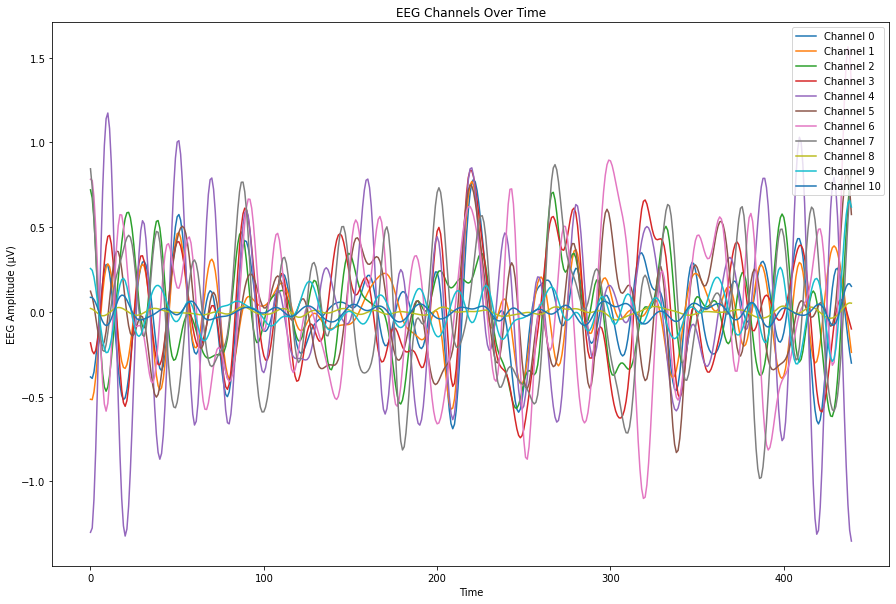

In [30]:
channels_to_plot = [0, 1, 2,3,4,5,6,7,8,9,10]  
eeg_data = df['eeg'][0]
time_points = np.arange(eeg_data.shape[1])  


plt.figure(figsize=(15, 10))

for channel in channels_to_plot:
    plt.plot(time_points, eeg_data[channel], label=f'Channel {channel}')  

plt.title('EEG Channels Over Time')
plt.xlabel('Time')
plt.ylabel('EEG Amplitude (µV)')
plt.legend(loc='upper right')
